In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings(action='ignore')

PATH = ""

In [4]:
hiter16 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv")
pitcher16 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv")

In [5]:
def prepro(hiter, pitcher):
    pitcher = pitcher[["GDAY_DS",'T_ID','VS_T_ID','HEADER_NO','INN2','R','ER','WLS']]
    hiter = hiter[["GDAY_DS",'T_ID','VS_T_ID','HEADER_NO','AB','HIT','H2','H3','HR']]
    
    hiter['HIT_SUM'] = hiter.iloc[:,2:].sum(axis=1)
    hiter['NG_ID'] = hiter.GDAY_DS.astype(str) + hiter.T_ID + hiter.VS_T_ID + hiter.HEADER_NO.astype(str)
    hiter=hiter[['NG_ID','AB','HIT_SUM']]
    
    pitcher['NG_ID'] = pitcher.GDAY_DS.astype(str) + pitcher.T_ID + pitcher.VS_T_ID + pitcher.HEADER_NO.astype(str)
    pitcher=pitcher[['NG_ID','INN2','R','ER','WLS']]
    mapping= {'W':2,'D':1,'L':0}
    pitcher['WLS'] = pitcher['WLS'].map(mapping)
    
    hit_pit_year = pd.merge(hiter,pitcher, on='NG_ID')
    
    return hit_pit_year

In [7]:
hiter17 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv")
pitcher17 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv")
hit_pit_17 = prepro(hiter17, pitcher17)

In [8]:
hiter18 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv")
pitcher18 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv")
hit_pit_18 = prepro(hiter18, pitcher18)

In [9]:
hiter19 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv")
pitcher19 = pd.read_csv(PATH+"2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv")
hit_pit_19 = prepro(hiter19, pitcher19)

In [10]:
hiter16.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'PA', 'AB',
       'RBI', 'RUN', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB',
       'IB', 'HP', 'KK', 'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN',
       'P_HIT_CN'],
      dtype='object')

In [11]:
pitcher16 = pitcher16[["GDAY_DS",'T_ID','VS_T_ID','HEADER_NO','INN2','R','ER','WLS']]

In [12]:
hiter16 = hiter16[["GDAY_DS",'T_ID','VS_T_ID','HEADER_NO','AB','HIT','H2','H3','HR']]

In [13]:
pitcher16.head()

,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,INN2,R,ER,WLS
0,20160401,LG,HH,0,36,4,4,W
1,20160401,HH,LG,0,34,5,4,L
2,20160401,NC,HT,0,27,4,4,W
3,20160401,HT,NC,0,24,5,5,L
4,20160401,SK,KT,0,27,8,8,L


In [14]:
hiter16.head()

,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,AB,HIT,H2,H3,HR
0,20160401,LG,HH,0,42,9,2,0,1
1,20160401,HH,LG,0,46,13,2,0,0
2,20160401,NC,HT,0,30,9,2,0,2
3,20160401,HT,NC,0,34,8,3,0,1
4,20160401,SK,KT,0,36,10,5,0,1


In [15]:
#hiter16.columns = map(str.lower, hiter16.columns)

In [16]:
hiter16['HIT_SUM'] = hiter16.iloc[:,2:].sum(axis=1)
hiter16['NG_ID'] = hiter16.GDAY_DS.astype(str) + hiter16.T_ID + hiter16.VS_T_ID + hiter16.HEADER_NO.astype(str)
hiter16=hiter16[['NG_ID','AB','HIT_SUM']]

In [17]:
pitcher16['NG_ID'] = pitcher16.GDAY_DS.astype(str) + pitcher16.T_ID + pitcher16.VS_T_ID + pitcher16.HEADER_NO.astype(str)
pitcher16=pitcher16[['NG_ID','INN2','R','ER','WLS']]
#pitcher16.drop(['GDAY_DS','T_ID','VS_T_ID','HEADER_NO'], axis=1,inplace=True)

In [18]:
mapping= {'W':2,'D':1,'L':0}
pitcher16['WLS'] = pitcher16['WLS'].map(mapping)

In [19]:
print(hiter16.shape, pitcher16.shape)

(1440, 3) (1440, 5)


In [20]:
hit_pit_16 = pd.merge(hiter16,pitcher16, on='NG_ID')

In [21]:
hit_pit = pd.concat([hit_pit_16,hit_pit_17,hit_pit_18,hit_pit_19])

In [22]:
hit_pit.head()

,NG_ID,AB,HIT_SUM,INN2,R,ER,WLS
0,20160401LGHH0,42,54,36,4,4,2
1,20160401HHLG0,46,61,34,5,4,0
2,20160401NCHT0,30,43,27,4,4,2
3,20160401HTNC0,34,46,24,5,5,0
4,20160401SKKT0,36,52,27,8,8,0


In [23]:
hit_pit.columns = map(str.lower,hit_pit.columns)

In [24]:
hit_pit.shape

(5760, 7)

In [26]:
hit_pit['beat_team']=hit_pit.ng_id.str[8:12]

In [27]:
hit_pit.beat_team.nunique()

90

In [28]:
le = LabelEncoder()
le.fit(hit_pit.beat_team)
hit_pit['beat_team_le']=le.transform(hit_pit.beat_team)

In [29]:
fe_hit_pit = hit_pit.drop(['ng_id','beat_team'], axis=1)

In [30]:
shuffle(fe_hit_pit).reset_index(inplace=True, drop=True)

In [31]:
fe_hit_pit.shape

(5760, 7)

In [32]:
fe_hit_pit.head()

,ab,hit_sum,inn2,r,er,wls,beat_team_le
0,42,54,36,4,4,2,27
1,46,61,34,5,4,0,2
2,30,43,27,4,4,2,46
3,34,46,24,5,5,0,13
4,36,52,27,8,8,0,65


In [33]:
from sklearn.model_selection import train_test_split

x_no_le= fe_hit_pit.drop(['beat_team_le','wls'], axis=1)
#x_le= fe_hit_pit.drop(['wls'],axis=1)
x_train, x_test,y_train,y_test = train_test_split(x_no_le, fe_hit_pit['wls'], test_size = 0.2, random_state= 0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=50, n_jobs=6, min_samples_split=3, max_depth=4, random_state=0)
rf.fit(x_train, y_train)
rf_pre = rf.predict(x_test)
accuracy = accuracy_score(rf_pre, y_test)

In [35]:
rf_pre

array([0, 0, 2, ..., 0, 2, 0], dtype=int64)

In [36]:
accuracy

0.8689236111111112

In [37]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [5, 10, 20,30],
           'max_depth' : [6, 8, 10,12],
           'min_samples_leaf' : [6, 12, 18],
           'min_samples_split' : [12, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = 5)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = 5)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 20}
최고 예측 정확도: 0.8950


In [38]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 6,
                                min_samples_split = 12,
                                random_state = 0,
                                n_jobs = 5)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.8984


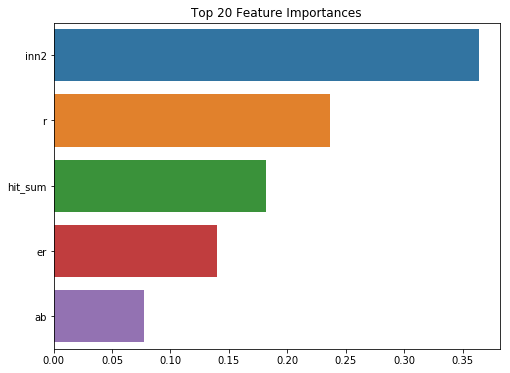

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [40]:
import keras
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [44]:
model = Sequential()
model.add(Dense(10, input_dim=5 , activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [46]:
early_stopping_callback = EarlyStopping(monitor='acc',patience=3)
model.fit(x_train, y_train, epochs=20, batch_size=10, callbacks=[early_stopping_callback])


Epoch 1/20
4608/4608 [==============================] - 1s 294us/step - loss: 0.6420 - accuracy: 0.7164
Epoch 2/20
4608/4608 [==============================] - 1s 288us/step - loss: 0.3366 - accuracy: 0.8754
Epoch 3/20
4608/4608 [==============================] - 1s 233us/step - loss: 0.2652 - accuracy: 0.8963
Epoch 4/20
4608/4608 [==============================] - 1s 311us/step - loss: 0.2362 - accuracy: 0.9058
Epoch 5/20
4608/4608 [==============================] - 1s 280us/step - loss: 0.2224 - accuracy: 0.9110
Epoch 6/20
4608/4608 [==============================] - 1s 265us/step - loss: 0.2151 - accuracy: 0.9145
Epoch 7/20
4608/4608 [==============================] - 2s 338us/step - loss: 0.2107 - accuracy: 0.9169
Epoch 8/20
4608/4608 [==============================] - 1s 297us/step - loss: 0.2068 - accuracy: 0.9158
Epoch 9/20
4608/4608 [==============================] - 1s 257us/step - loss: 0.2032 - accuracy: 0.9178
Epoch 10/20
4608/4608 [==============================] - 1s 239

In [47]:
model.evaluate(x_test,y_test)

1152/1152 [==============================] - 0s 100us/step


[0.1913031560058395, 0.9149305820465088]

In [61]:
x_test

array([[ 0.51358675,  0.50078356,  0.17117046,  1.02923463,  1.20469592],
       [-1.12129475, -1.06453205,  0.17117046,  0.4779807 ,  0.62869189],
       [ 0.04647775, -0.05825773,  0.17117046, -1.45140805, -1.38732219],
       ...,
       [-1.35484925, -1.39995683, -1.20216702, -0.62452716, -0.52331616],
       [-1.58840375, -1.28814857,  0.17117046, -1.17578108, -1.09932018],
       [-1.12129475, -1.28814857, -1.20216702, -0.34890019, -0.23531414]])

In [66]:
predict = model.predict(x_test)

array([[8.6471421e-01, 3.9832630e-05, 1.3524596e-01],
       [9.3522781e-01, 5.5040840e-05, 6.4717144e-02],
       [4.3672416e-03, 5.1386542e-06, 9.9562764e-01],
       ...,
       [9.9054950e-01, 4.4448121e-04, 9.0060858e-03],
       [1.4754815e-02, 7.8876083e-06, 9.8523730e-01],
       [9.9538702e-01, 4.4603425e-04, 4.1669733e-03]], dtype=float32)

In [64]:
len(x_test)

1152

In [65]:
np.ceil(len(x_test)/10)

116.0